<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/%D0%9F%D0%9C-19/%D0%BA_%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_10_%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оптимизация в R

Оптимизация — это задача нахождения экстремума (минимума или максимума) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных равенств и/или неравенств.

Стандартная математическая задача оптимизации формулируется таким образом. Среди элементов χ, образующих множества Χ, найти такой элемент χ*, который доставляет минимальное значение f(χ*) заданной функции f(χ). Для того, чтобы корректно поставить задачу оптимизации, необходимо задать:

* Допустимое множество — множество ${\displaystyle \mathbb {X} =\{{\vec {x}}|\;g_{i}({\vec {x}})\leq 0,\;i=1,\ldots ,m\}\subset \mathbb {R} ^{n}}$;
* Целевую функцию — отображение ${\displaystyle f:\;\mathbb {X} \to \mathbb {R} }f:\$;
* Критерий поиска (max или min).




Тогда решить задачу ${\displaystyle f(x)\to \min _{{\vec {x}}\in \mathrm {X} }}$ означает одно из:

* Показать, что ${\displaystyle \mathbb {X} =\varnothing }$.
*Показать, что целевая функция ${\displaystyle f({\vec {x}})}$  не ограничена снизу.
* Найти ${\displaystyle {\vec {x}}^{*}\in \mathbb {X} :\;f({\vec {x}}^{*})=\min _{{\vec {x}}\in \mathbb {X} }f({\vec {x}})}$.
* Если ${\displaystyle \nexists {\vec {x}}^{*}}$, то найти ${\displaystyle \inf _{{\vec {x}}\in \mathbb {X} }f({\vec {x}})}$.

Если минимизируемая функция не является выпуклой, то часто ограничиваются поиском локальных минимумов и максимумов: точек ${\displaystyle x_{0}}$ таких, что всюду в некоторой их окрестности $f(x)\geq f(x_{0})$ для минимума и $\leq f(x_{0})$ для максимума.

Если допустимое множество ${\mathbb  {X}}={\mathbb  {R}}^{n}$, то такая задача называется задачей безусловной оптимизации, в противном случае — задачей условной оптимизации.

Существуют разные классификации методов оптимизации. Рассмотрим далее численные методы.

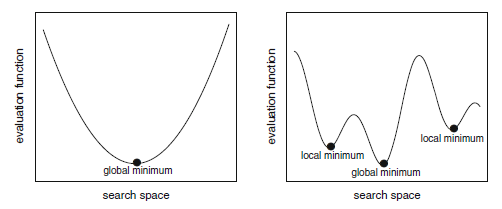

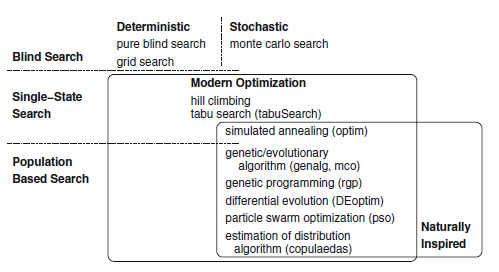

Тестовые функции

* Бинарные задачи sum of bits и max sin. 

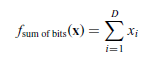

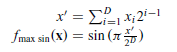

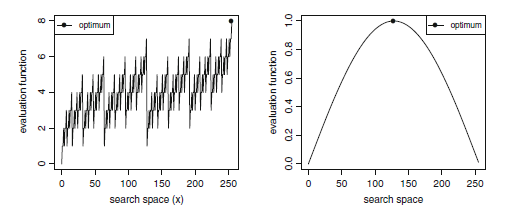

* оптимальное решение для sum of bits  $x = ( 1; 1; 1; 1; 1; 1; 1; 1; 1)$, $f(x)=8$
* оптимальное решение для max sin $ x = ( 1; 0; 0; 0; 0; 0; 0; 0; 0)$, $f(x) = 128$.



* Bag prices - это задача целочисленной оптимизации, которая
имитирует решение об установлении цен на изделия, производимые на фабрике сумок.
Фабрика производит до пяти ($D = 5$) различных типов сумок, стоимость единицы которых составляет $u=(\$30; \$25; \$20; \$15; \$10)$, где $u_i$ - затраты на производство продукта $i$. Себестоимость производства $i$-го изделия равна $cost(x_i) = 100 + u_i \times sales(x_i)$. Количество ожидаемых продаж, то есть то, что будет произведено фабрикой, зависит цены продажи продукта ($x$) и маркетинговых усилий ($m$), в соответствии с формулой $sales(x_i) = round((1000/\ln(x_i + 200) - 141) \times m_i)$, где round -
обычная функция округления, а $m = (2.0; 1.75; 1.5; 1.25; 1.0)$. Менеджеру
на фабрике необходимо определить отпускные цены для каждого изделия ($x_i$ , в \$), в пределах от $\$1$ до $\$1 000$, чтобы максимизировать ожидаемую прибыль, связанную со следующим производственным циклом:

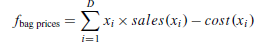

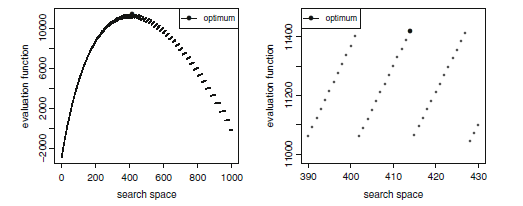

Оптимальное решение для 5 различных типов изделий ($D = 5$) $
x = (414; 404; 408; 413; 3950)$, что соответствует значениею прибыли $\$43,899$.

* sphere и функция Растригина

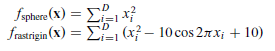

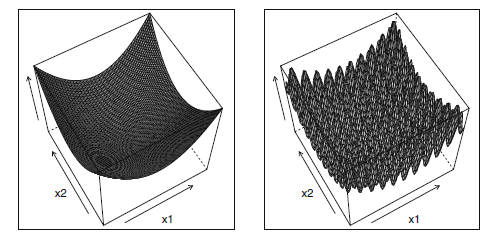

In [ ]:
install.packages("rminer")
install.packages("tabuSearch")
install.packages("genalg")
install.packages("DEoptim")
install.packages("pso")
install.packages("copulaedas")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gsl’, ‘copula’, ‘vines’


Warning message in install.packages("copulaedas"):
“installation of package ‘gsl’ had non-zero exit status”
Warning message in install.packages("copulaedas"):
“installation of package ‘copula’ had non-zero exit status”
Warning message in install.packages("copulaedas"):
“installation of package ‘vines’ had non-zero exit status”
Warning message in install.packages("copulaedas"):
“installation of package ‘copulaedas’ had non-zero exit status

**Полностью слепой поиск**

In [ ]:
# read D bits from integer x:
binint=function(x,D)
{ 
    x=rev(intToBits(x)[1:D]) # get D bits
# remove extra 0s from raw type:
    as.numeric(unlist(strsplit(as.character(x),""))[(1:D)*2])
}

# convert binary vector into integer: code inspired in
# http://stackoverflow.com/questions/12892348/
# in-r-how-to-convert-binary-string-to-binary-or-decimal-value
intbin=function(x) sum(2^(which(rev(x==1))-1))
# sum a raw binary object x (evaluation function):
sumbin=function(x) sum(as.numeric(x))
# max sin of binary raw object x (evaluation function):
maxsin=function(x,Dim) sin(pi*(intbin(x))/(2^Dim))

In [ ]:
# compute the bag factory profit for x:
# x - a vector of prices
profit=function(x) # x - a vector of prices
{   
    x=round(x,digits=0) # convert x into integer
    s=sales(x) # get the expected sales
    c=cost(s) # get the expected cost
    profit=sum(s*x-c) # compute the profit
    return(profit)
# local variables x, s, c and profit are lost from here
}
# compute the cost for producing units:
# units - number of units produced
# A - fixed cost, cpu - cost per unit
cost=function(units,A=100,cpu=35-5*(1:length(units)))
{ return(A+cpu*units) }
# compute the estimated sales for x:
# x - a vector of prices, m - marketing effort
# A, B, C - constants of the estimated function
sales=function(x,A=1000,B=200,C=141,
m=seq(2,length.out=length(x),by=-0.25))
{ return(round(m*(A/log(x+B)-C),digits=0))}
# example of a simple recursive function:
fact=function(x=0) # x - integer number
{ if(x==0) return(1) else return(x*fact(x-1))}  

In [ ]:

sphere=function(x) sum(x^2)
rastrigin=function(x) 10*length(x)+sum(x^2-10*cos(2*pi*x))

In [ ]:


# full bind search method
# search - matrix with solutions x D
# FUN - evaluation function
# type - "min" or "max"
# ... - extra parameters for FUN
fsearch=function(search,FUN,type="min",...)
{
    x=apply(search,1,FUN,...) # run FUN over all search rows
    ib=switch(type,min=which.min(x),max=which.max(x))
    return(list(index=ib,sol=search[ib,],eval=x[ib]))
}

In [ ]:

# depth-first full search method
# l - level of the tree
# b - branch of the tree
# domain - vector list of size D with domain values
# FUN - eval function
# type - "min" or "max"
# D - dimension (number of variables)
# x - current solution vector
# bcur - current best sol
# ... - extra parameters for FUN
dfsearch=function(l=1,b=1,domain,FUN,type="min",
D=length(domain),
x=rep(NA,D),
bcur=switch(type,min=list(sol=NULL,eval=Inf),
max=list(sol=NULL,eval=-Inf)),
...)
{ if((l-1)==D) # "leave" with solution x to be tested:
{ f=FUN(x,...);fb=bcur$eval
ib=switch(type,min=which.min(c(fb,f)),
max=which.max(c(fb,f)))
if(ib==1) return (bcur) else return(list(sol=x,eval=f))
}
else # go through sub branches
{ for(j in 1:length(domain[[l]]))
{ x[l]=domain[[l]][j]
bcur=dfsearch(l+1,j,domain,FUN,type,D=D,
x=x,bcur=bcur,...)
}
return(bcur)
}
}

In [ ]:


D=8 # number of dimensions
x=0:(2^D-1) # integer search space
# set full search space in solutions x D:
search=t(sapply(x,binint,D=D))
# set the domain values (D binary variables):
domain=vector("list",D)
for(i in 1:D) domain[[i]]=c(0,1) # bits
# sum of bits, fsearch:
S1=fsearch(search,sumbin,"max") # full search
cat("fsearch best s:",S1$sol,"f:",S1$eval,"\n")
# sum of bits, dfsearch:
S2=dfsearch(domain=domain,FUN=sumbin,type="max")
cat("dfsearch best s:",S2$sol,"f:",S2$eval,"\n")
# max sin, fsearch:
S3=fsearch(search,maxsin,"max",Dim=8) # full search
cat("fsearch best s:",S3$sol,"f:",S3$eval,"\n")
# max sin, dfsearch:
S4=dfsearch(domain=domain,FUN=maxsin,type="max",Dim=8)
cat("dfsearch best s:",S4$sol,"f:",S4$eval,"\n")

fsearch best s: 1 1 1 1 1 1 1 1 f: 8 
dfsearch best s: 1 1 1 1 1 1 1 1 f: 8 
fsearch best s: 1 0 0 0 0 0 0 0 f: 1 
dfsearch best s: 1 0 0 0 0 0 0 0 f: 1 


In [ ]:


ibag=function(D) # D - type of bag
{ x=1:1000 # price for each bag type
# set search space for one bag:
search=matrix(ncol=5,nrow=1000)
search[]=1; search[,D]=x
S1=fsearch(search,profit,"max")
S1$sol[D] # best price
}
# compute the best price for all bag types:
S=sapply(1:5,ibag)
# show the optimum solution:
cat("optimum s:",S,"f:",profit(S),"\n")

optimum s: 414 404 408 413 395 f: 43899 


**Жадный поиск**

In [ ]:


# standard grid search method (uses fsearch)
# step - vector with step size for each dimension D
# lower - vector with lowest values for each dimension
# upper - vector with highest values for each dimension
# FUN - evaluation function
# type - "min" or "max"
# ... - extra parameters for FUN
gsearch=function(step,lower,upper,FUN,type="min",...)
{ D=length(step) # dimension
domain=vector("list",D) # domain values
L=vector(length=D) # auxiliary vector
for(i in 1:D)
{ domain[[i]]=seq(lower[i],upper[i],by=step[i])
L[i]=length(domain[[i]])
}
LS=prod(L)
s=matrix(ncol=D,nrow=LS) # set the search space
for(i in 1:D)
{
if(i==1) E=1 else E=E*L[i-1]
s[,i]=rep(domain[[i]],length.out=LS,each=E)
}
fsearch(s,FUN,type,...) # best solution
}
# standard grid search method (uses dfsearch)
gsearch2=function(step,lower,upper,FUN,type="min",...)
{ D=length(step) # dimension
domain=vector("list",D) # domain values
for(i in 1:D) domain[[i]]=seq(lower[i],upper[i],by=step[i])
dfsearch(domain=domain,FUN=FUN,type=type,...) # solution
}
# nested grid search method (uses fsearch)
# levels - number of nested levels
ngsearch=function(levels,step,lower,upper,FUN,type,...)
{ stop=FALSE;i=1 # auxiliary objects
bcur=switch(type,min=list(sol=NULL,eval=Inf),
max=list(sol=NULL,eval=-Inf))
while(!stop) # cycle while stopping criteria is not met
{
s=gsearch(step,lower,upper,FUN,type,...)
# if needed, update best current solution:
if( (type=="min" && s$eval<bcur$eval)||
(type=="max" && s$eval>bcur$eval)) bcur=s
if(i<levels) # update step, lower and upper:
{ step=step/2
interval=(upper-lower)/4
lower=sapply(lower,max,s$sol-interval)
upper=sapply(upper,min,s$sol+interval)
}
 if(i>=levels || sum((upper-lower)<=step)>0) stop=TRUE
else i=i+1
}
return(bcur) # best solution
}

In [ ]:


# grid search for all bag prices, step of 100$
PTM=proc.time() # start clock
S1=gsearch(rep(100,5),rep(1,5),rep(1000,5),profit,"max")
sec=(proc.time()-PTM)[3] # get seconds elapsed
cat("gsearch best s:",S1$sol,"f:",S1$eval,"time:",sec,"s\n")
# grid search 2 for all bag prices, step of 100$
PTM=proc.time() # start clock
S2=gsearch2(rep(100,5),rep(1,5),rep(1000,5),profit,"max")
sec=(proc.time()-PTM)[3] # get seconds elapsed
cat("gsearch2 best s:",S2$sol,"f:",S2$eval,"time:",sec,"s\n")
# nested grid with 3 levels and initial step of 500$
PTM=proc.time() # start clock
S3=ngsearch(3,rep(500,5),rep(1,5),rep(1000,5),profit,"max")
sec=(proc.time()-PTM)[3] # get seconds elapsed
cat("ngsearch best s:",S3$sol,"f:",S3$eval,"time:",sec,"s\n")

gsearch best s: 401 401 401 401 501 f: 43142 time: 1.815 s
gsearch2 best s: 401 401 401 401 501 f: 43142 time: 2.028 s
ngsearch best s: 376.375 376.375 376.375 501.375 501.375 f: 42823 time: 0.03 s


In [ ]:


# real-value functions: sphere and rastrigin:
sphere=function(x) sum(x^2)
rastrigin=function(x) 10*length(x)+sum(x^2-10*cos(2*pi*x))
cat("sphere:\n") # D=2, easy task
S=gsearch(rep(1.1,2),rep(-5.2,2),rep(5.2,2),sphere,"min")
cat("gsearch s:",S$sol,"f:",S$eval,"\n")
S=ngsearch(3,rep(3,2),rep(-5.2,2),rep(5.2,2),sphere,"min")
cat("ngsearch s:",S$sol,"f:",S$eval,"\n")
cat("rastrigin:\n") # D=2, easy task
S=gsearch(rep(1.1,2),rep(-5.2,2),rep(5.2,2),rastrigin,"min")
cat("gsearch s:",S$sol,"f:",S$eval,"\n")
S=ngsearch(3,rep(3,2),rep(-5.2,2),rep(5.2,2),rastrigin,"min")
cat("ngsearch s:",S$sol,"f:",S$eval,"\n")

sphere:
gsearch s: 0.3 0.3 f: 0.18 
ngsearch s: -0.1 -0.1 f: 0.02 
rastrigin:
gsearch s: -1.9 -1.9 f: 11.03966 
ngsearch s: -0.1 -0.1 f: 3.83966 


**Методы Монте-Карло**

In [ ]:


# montecarlo uniform search method
# N - number of samples
# lower - vector with lowest values for each dimension
# upper - vector with highest values for each dimension
# domain - vector list of size D with domain values
# FUN - evaluation function
# type - "min" or "max"
# ... - extra parameters for FUN
mcsearch=function(N,lower,upper,FUN,type="min",...)
{ D=length(lower)
s=matrix(nrow=N,ncol=D) # set the search space
for(i in 1:N) s[i,]=runif(D,lower,upper)
fsearch(s,FUN,type,...) # best solution
}

In [ ]:


N=10000 # set the number of samples
cat("monte carlo search (N:",N,")\n")
# bag prices
cat("bag prices:")
S=mcsearch(N,rep(1,5),rep(1000,5),profit,"max")
cat("s:",S$sol,"f:",S$eval,"\n")
# real-value functions: sphere and rastrigin:
sphere=function(x) sum(x^2)
rastrigin=function(x) 10*length(x)+sum(x^2-10*cos(2*pi*x))
D=c(2,30)
label="sphere"
for(i in 1:length(D))
{ S=mcsearch(N,rep(-5.2,D[i]),rep(5.2,D[i]),sphere,"min")
cat(label,"D:",D[i],"s:",S$sol[1:2],"f:",S$eval,"\n")
}
label="rastrigin"
for(i in 1:length(D))
{ S=mcsearch(N,rep(-5.2,D[i]),rep(5.2,D[i]),rastrigin,"min")
cat(label,"D:",D[i],"s:",S$sol[1:2],"f:",S$eval,"\n")
}

monte carlo search (N: 10000 )
bag prices:s: 466.6996 362.546 324.0986 484.9785 457.1732 f: 42375 
sphere D: 2 s: -0.05949115 -0.001737302 f: 0.003542215 
sphere D: 30 s: -1.964348 -1.152588 f: 115.942 
rastrigin D: 2 s: -0.0503319 -0.03569749 f: 0.7501935 
rastrigin D: 30 s: 2.180547 1.062147 f: 375.7214 


**Процедуры локального поиска**

**Восхождение к вершине**

In [ ]:


# pure hill climbing:
# par - initial solution
# fn - evaluation function
# change - function to generate the next candidate
# lower - vector with lowest values for each dimension
# upper - vector with highest values for each dimension
# control - list with stopping and monitoring method:
# $maxit - maximum number of iterations
# $REPORT - frequency of monitoring information
# type - "min" or "max"
# ... - extra parameters for FUN
hclimbing=function(par,fn,change,lower,upper,control,
type="min",...)
{ fpar=fn(par,...)
for(i in 1:control$maxit)
{
par1=change(par,lower,upper)
fpar1=fn(par1,...)
if(control$REPORT>0 &&(i==1||i%%control$REPORT==0))
cat("i:",i,"s:",par,"f:",fpar,"s’",par1,"f:",fpar1,"\n")
if( (type=="min" && fpar1<fpar)
|| (type=="max" && fpar1>fpar)) { par=par1;fpar=fpar1 }
}
if(control$REPORT>=1) cat("best:",par,"f:",fpar,"\n")
return(list(sol=par,eval=fpar))
}
# slight random change of vector par:
# par - initial solution
# lower - vector with lowest values for each dimension
# upper - vector with highest values for each dimension
# dist - random distribution function
# round - use integer (TRUE) or continuous (FALSE) search
# ... - extra parameters for dist
# examples: dist=rnorm, mean=0, sd=1; dist=runif, min=0,max=1
hchange=function(par,lower,upper,dist,round=TRUE,...)
{ D=length(par) # dimension
step=dist(D,...) # slight step
if(round) step=round(step)
par1=par+step
# return par1 within [lower,upper]:
return(ifelse(par1<lower,lower,ifelse(par1>upper,upper,par1)))
}

In [ ]:


# hill climbing for sum of bits, one run:
D=8 # dimension
s=rep(0,D) # c(0,0,0,0,...)
C=list(maxit=10,REPORT=1) # maximum of 10 iterations
ichange=function(par,lower,upper) # integer change
{ hchange(par,lower,upper,rnorm,mean=0,sd=1) }
hclimbing(s,sumbin,change=ichange,lower=rep(0,D),upper=rep(1,D),
control=C,type="max")

i: 1 s: 0 0 0 0 0 0 0 0 f: 0 s’ 0 0 0 0 0 0 0 0 f: 0 
i: 2 s: 0 0 0 0 0 0 0 0 f: 0 s’ 1 0 0 1 1 1 1 1 f: 6 
i: 3 s: 1 0 0 1 1 1 1 1 f: 6 s’ 1 0 0 1 1 1 1 1 f: 6 
i: 4 s: 1 0 0 1 1 1 1 1 f: 6 s’ 1 0 0 1 1 0 1 1 f: 5 
i: 5 s: 1 0 0 1 1 1 1 1 f: 6 s’ 1 0 1 1 1 1 1 1 f: 7 
i: 6 s: 1 0 1 1 1 1 1 1 f: 7 s’ 1 0 0 1 1 1 1 1 f: 6 
i: 7 s: 1 0 1 1 1 1 1 1 f: 7 s’ 1 0 0 1 1 1 1 1 f: 6 
i: 8 s: 1 0 1 1 1 1 1 1 f: 7 s’ 1 1 1 1 1 0 1 1 f: 7 
i: 9 s: 1 0 1 1 1 1 1 1 f: 7 s’ 0 1 1 0 0 0 1 0 f: 3 
i: 10 s: 1 0 1 1 1 1 1 1 f: 7 s’ 1 0 1 1 0 0 1 1 f: 5 
best: 1 0 1 1 1 1 1 1 f: 7 


$sol
[1] 1 0 1 1 1 1 1 1

$eval
[1] 7

In [ ]:


# hill climbing for all bag prices, one run:
D=5; C=list(maxit=10000,REPORT=10000) # 10000 iterations
s=sample(1:1000,D,replace=TRUE) # initial search
ichange=function(par,lower,upper) # integer value change
{ hchange(par,lower,upper,rnorm,mean=0,sd=1) }
hclimbing(s,profit,change=ichange,lower=rep(1,D),
upper=rep(1000,D),control=C,type="max")
# hill climbing for sphere, one run:
sphere=function(x) sum(x^2)
D=2; C=list(maxit=10000,REPORT=10000)
rchange=function(par,lower,upper) # real value change
{ hchange(par,lower,upper,rnorm,mean=0,sd=0.5,round=FALSE) }
s=runif(D,-5.2,5.2) # initial search
hclimbing(s,sphere,change=rchange,lower=rep(-5.2,D),
upper=rep(5.2,D),control=C,type="min")

i: 1 s: 185 606 481 19 871 f: 26829 s’ 184 606 482 19 870 f: 26791 
i: 10000 s: 217 611 479 137 916 f: 32931 s’ 218 611 478 138 917 f: 31785 
best: 217 611 479 137 916 f: 32931 


$sol
[1] 217 611 479 137 916

$eval
[1] 32931

i: 1 s: 4.44062 4.359096 f: 38.72082 s’ 4.750102 4.842586 f: 46.0141 
i: 10000 s: 0.004303411 -0.002334812 f: 2.39707e-05 s’ -0.8018136 -0.3430349 f: 0.760578 
best: 0.004303411 -0.002334812 f: 2.39707e-05 


$sol
[1]  0.004303411 -0.002334812

$eval
[1] 2.39707e-05

**Имитация отжига**

In [ ]:


# sum a raw binary object x (evaluation function):
minsumbin=function(x) (length(x)-sum(x)) # optim only minimizes!
# SANN for sum of bits, one run:
D=8 # dimension
s=rep(0,D) # c(0,0,0,0,...)
C=list(maxit=10,temp=10,tmax=1,trace=TRUE,REPORT=1)
bchange=function(par) # binary change
{ D=length(par)
hchange(par,lower=rep(0,D),upper=rep(1,D),rnorm,mean=0,sd=1)
}
s=optim(s,minsumbin,gr=bchange,method="SANN",control=C)
cat("best:",s$par,"f:",s$value,"(max: fs:",sum(s$par),")\n")



sann objective function values
initial       value 8.000000
iter        1 value 6.000000
iter        2 value 6.000000
iter        3 value 6.000000
iter        4 value 5.000000
iter        5 value 5.000000
iter        6 value 5.000000
iter        7 value 5.000000
iter        8 value 5.000000
iter        9 value 4.000000
final         value 4.000000
sann stopped after 9 iterations
best: 0 0 0 1 1 0 1 1 f: 4 (max: fs: 4 )


**Поиск с запретами**

In [ ]:
library(tabuSearch) # load tabuSearch package
# tabu search for sum of bits:
sumbin=function(x) (sum(x)) # sum of bits
D=8 # dimension
s=rep(0,D) # c(0,0,0,0,...)
s=tabuSearch(D,iters=2,objFunc=sumbin,config=s,neigh=2,
listSize=4,nRestarts=1)
b=which.max(s$eUtilityKeep) # best index
cat("best:",s$configKeep[b,],"f:",s$eUtilityKeep[b],"\n")
# tabu search for max sin:
intbin=function(x) sum(2^(which(rev(x==1))-1))
maxsin=function(x) # max sin (explained in Chapter 3)
{ D=length(x);x=intbin(x); return(sin(pi*(as.numeric(x))/(2^D)))
}
D=8
s=rep(0,D) # c(0,0,0,0,...)
s=tabuSearch(D,iters=2,objFunc=maxsin,config=s,neigh=2,
listSize=4,nRestarts=1)
b=which.max(s$eUtilityKeep) # best index
cat("best:",s$configKeep[b,],"f:",s$eUtilityKeep[b],"\n")




best: 1 1 1 1 1 1 1 1 f: 8 
best: 0 1 1 0 0 0 0 0 f: 0.9238795 


In [ ]:


# tabu search for bag prices:
D=5 # dimension (number of prices)
MaxPrice=1000
Dim=ceiling(log(MaxPrice,2)) # size of each price (=10)
size=D*Dim # total number of bits (=50)
s=sample(0:1,size,replace=TRUE) # initial search
intbin=function(x) # convert binary to integer
{ sum(2^(which(rev(x==1))-1)) } # explained in Chapter 3
bintbin=function(x) # convert binary to D prices
{ # note: D and Dim need to be set outside this function
s=vector(length=D)
for(i in 1:D) # convert x into s:
{ ini=(i-1)*Dim+1;end=ini+Dim-1
s[i]=intbin(x[ini:end])
}
return(s)
}
bprofit=function(x) # profit for binary x
{ s=bintbin(x)
if(sum(s>MaxPrice)>0) f=-Inf # death penalty
else f=profit(s)
return(f)
}
cat("initial:",bintbin(s),"f:",bprofit(s),"\n")
s=tabuSearch(size,iters=100,objFunc=bprofit,config=s,neigh=4,
listSize=16,nRestarts=1)
b=which.max(s$eUtilityKeep) # best index
cat("best:",bintbin(s$configKeep[b,]),"f:",s$eUtilityKeep[b],
"\n")

initial: 474 153 648 970 799 f: 28275 
best: 395 377 344 348 388 f: 43145 


In [ ]:
install.packages("rminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:


library(rminer) # get meanint
# comparison setup:
crastrigin=function(x)
{ 
  f=10*length(x)+sum(x^2-10*cos(2*pi*x))
  # global assignment code: <<-
  EV<<-EV+1 # increase evaluations
  if(f<BEST) BEST<<-f
    if(EV<=MAXIT) F[EV]<<-BEST
  return(f)
}
Runs=50; D=20; MAXIT=10000
lower=rep(-5.2,D);upper=rep(5.2,D)
rchange1=function(par,lower,upper) # change for hclimbing
{ 
  hchange(par,lower=lower,upper=upper,rnorm,
  mean=0,sd=0.5,round=FALSE) 
}
rchange2=function(par) # change for optim
{ 
  hchange(par,lower=lower,upper=upper,rnorm,
  mean=0,sd=0.5,round=FALSE) 
}
CHILL=list(maxit=MAXIT,REPORT=0)
CSANN=list(maxit=MAXIT,temp=10,trace=FALSE)
Methods=c("monte carlo","hill climbing","simulated annealing")
# run all optimizations and store results:
RES=vector("list",length(Methods)) # all results
for(m in 1:length(Methods))
  RES[[m]]=matrix(nrow=MAXIT,ncol=Runs)
  for(R in 1:Runs) # cycle all runs
  { 
      s=runif(D,-5.2,5.2) # initial search point
      EV=0; BEST=Inf; F=rep(NA,MAXIT) # reset these vars.
      # monte carlo:
    mcsearch(MAXIT,lower=lower,upper=upper,FUN=crastrigin)
    RES[[1]][,R]=F
    # hill climbing:
    EV=0; BEST=Inf; F=rep(NA,MAXIT)
    hclimbing(s,crastrigin,change=rchange1,lower=lower,
    upper=upper,control=CHILL,type="min")
    RES[[2]][,R]=F
    # SANN:
    EV=0; BEST=Inf; F=rep(NA,MAXIT)
    optim(s,crastrigin,method="SANN",gr=rchange2,control=CSANN)
    RES[[3]][,R]=F
  }
# aggregate (average and confidence interval) results:
AV=matrix(nrow=MAXIT,ncol=length(Methods))
CI=AV
for(m in 1:length(Methods))
{
for(i in 1:MAXIT)
{
mi=meanint(RES[[m]][i,])
AV[i,m]=mi$mean;CI[i,m]=mi$int
}
}
# show comparative PDF graph:
# plot a nice confidence interval bar:
confbar=function(x,ylower,yupper,K=100)
{ segments(x-K,yupper,x+K)
segments(x-K,ylower,x+K)
segments(g2,ylower,g2,yupper)
}
pdf("comp-rastrigin.pdf",width=5,height=5)
par(mar=c(4.0,4.0,0.1,0.6)) # reduce default plot margin
MIN=min(AV-CI);MAX=max(AV+CI)
# 10.000 are too much points, thus two grids are used
# to improve clarity:
g1=seq(1,MAXIT,length.out=1000) # grid for lines
g2=seq(1,MAXIT,length.out=11) # grid for confbar
plot(g1,AV[g1,3],ylim=c(MIN,MAX),type="l",lwd=2,
ylab="average best",xlab="number of evaluations")
confbar(g2,AV[g2,3]-CI[g2,3],AV[g2,3]+CI[g2,3])
lines(g1,AV[g1,2],lwd=2,lty=2)
confbar(g2,AV[g2,2]-CI[g2,2],AV[g2,2]+CI[g2,2])
lines(g1,AV[g1,1],lwd=2,lty=3)
confbar(g2,AV[g2,1]-CI[g2,1],AV[g2,1]+CI[g2,1])
legend("topright",legend=rev(Methods),lwd=2,lty=1:3)
dev.off() # close the PDF device

png 
  2

In [ ]:
library(genalg) # load genalg package
# genetic algorithm search for bag prices:


In [ ]:

# genetic algorithm search for bag prices:
D=5 # dimension (number of prices)
MaxPrice=1000
Dim=ceiling(log(MaxPrice,2)) # size of each price (=10)
size=D*Dim # total number of bits (=50)
intbin=function(x) # convert binary to integer
{ sum(2^(which(rev(x==1))-1)) } # explained in Chapter 3
bintbin=function(x) # convert binary to D prices
{ # note: D and Dim need to be set outside this function
s=vector(length=D)
for(i in 1:D) # convert x into s:
{ ini=(i-1)*Dim+1;end=ini+Dim-1
s[i]=intbin(x[ini:end])
}
return(s)
}
bprofit=function(x) # profit for binary x
{ s=bintbin(x)
s=ifelse(s>MaxPrice,MaxPrice,s) # repair!
f=-profit(s) # minimization task!
return(f)
}
# genetic algorithm execution:
G=rbga.bin(size=size,popSize=50,iters=100,zeroToOneRatio=1,
evalFunc=bprofit,elitism=1)
# show results:
b=which.min(G$evaluations) # best individual
cat("best:",bintbin(G$population[b,]),"f:",-G$evaluations[b],
"\n")
pdf("genalg1.pdf") # personalized plot of G results
plot(-G$best,type="l",lwd=2,ylab="profit",xlab="generations")
lines(-G$mean,lty=2,lwd=2)
legend("bottomright",c("best","mean"),lty=1:2,lwd=2)
dev.off()
summary(G,echo=TRUE) # same as summary.rbga

best: 401 431 391 391 395 f: 43735 


png 
  2

GA Settings
  Type                  = binary chromosome
  Population size       = 50
  Number of Generations = 100
  Elitism               = 1
  Mutation Chance       = 0.0196078431372549

Search Domain
  Var 1 = [,]
  Var 0 = [,]

GA Results
  Best Solution : 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 


In [ ]:

# evolutionary algorithm for sphere:
sphere=function(x) sum(x^2)
D=2
monitor=function(obj)
{ if(i==1)
{ plot(obj$population,xlim=c(-5.2,5.2),ylim=c(-5.2,5.2),
xlab="x1",ylab="x2",type="p",pch=16,
col=gray(1-i/maxit))
}
else if(i%%K==0) points(obj$population,pch=16,
col=gray(1-i/maxit))
i<<-i+1 # global update
}
maxit=100
K=5 # store population values every K generations
i=1 # initial generation
# evolutionary algorithm execution:
pdf("genalg2.pdf",width=5,height=5)
set.seed(12345) # set for replicability purposes
E=rbga(rep(-5.2,D),rep(5.2,D),popSize=5,iters=maxit,
monitorFunc=monitor,evalFunc=sphere)
b=which.min(E$evaluations) # best individual
cat("best:",E$population[b,],"f:",E$evaluations[b],"\n")
dev.off()

best: 0.02438428 0.09593309 f: 0.009797751 


png 
  2

In [ ]:

### sphere-DEoptim.R file ###
library(DEoptim) # load DEoptim
sphere=function(x) sum(x^2)
D=2
maxit=100
set.seed(12345) # set for replicability
C=DEoptim.control(strategy=1,NP=5,itermax=maxit,CR=0.9,F=0.8,
trace=25,storepopfrom=1,storepopfreq=1)
# perform the optimization:
D=suppressWarnings(DEoptim(sphere,rep(-5.2,D),rep(5.2,D),
control=C))
# show result:
summary(D)
pdf("DEoptim.pdf",onefile=FALSE,width=5,height=9,
colormodel="gray")
plot(D,plot.type="storepop")
dev.off()
cat("best:",D$optim$bestmem,"f:",D$optim$bestval,"\n")


Loading required package: parallel


DEoptim package
Differential Evolution algorithm in R
Authors: D. Ardia, K. Mullen, B. Peterson and J. Ulrich




Iteration: 25 bestvalit: 0.644692 bestmemit:    0.799515    0.073944
Iteration: 50 bestvalit: 0.308293 bestmemit:    0.550749   -0.070493
Iteration: 75 bestvalit: 0.290737 bestmemit:    0.535771   -0.060715
Iteration: 100 bestvalit: 0.256731 bestmemit:    0.504867   -0.042906

***** summary of DEoptim object ***** 
best member   :  0.50487 -0.04291 
best value    :  0.25673 
after         :  100 generations 
fn evaluated  :  505 times 
*************************************


png 
  2

best: 0.5048666 -0.0429055 f: 0.2567311 


In [ ]:
### sphere-psoptim.R file ###
library(pso) # load pso
sphere=function(x) sum(x^2)
D=2; maxit=10; s=5
set.seed(12345) # set for replicability
C=list(trace=1,maxit=maxit,REPORT=1,trace.stats=1,s=s)
# perform the optimization:
PSO=psoptim(rep(NA,D),fn=sphere,lower=rep(-5.2,D),
upper=rep(5.2,D),control=C)
# result:
pdf("psoptim1.pdf",width=5,height=5)
j=1 # j-th parameter
plot(xlim=c(1,maxit),rep(1,s),PSO$stats$x[[1]][j,],pch=19,
xlab="iterations",ylab=paste("s_",j," value",sep=""))
for(i in 2:maxit) points(rep(i,s),PSO$stats$x[[i]][j,],pch=19)
dev.off()
pdf("psoptim2.pdf",width=5,height=5)
plot(PSO$stats$error,type="l",lwd=2,xlab="iterations",
ylab="best fitness")
dev.off()
cat("best:",PSO$par,"f:",PSO$value,"\n")

S=5, K=3, p=0.488, w0=0.7213, w1=0.7213, c.p=1.193, c.g=1.193

v.max=NA, d=14.71, vectorize=FALSE, hybrid=off

It 1: fitness=3.318

It 2: fitness=1.504

It 3: fitness=0.01706

It 4: fitness=0.01706

It 5: fitness=0.01706

It 6: fitness=0.01294

It 7: fitness=0.01273

It 8: fitness=0.01273

It 9: fitness=0.01273

It 10: fitness=0.01273

Maximal number of iterations reached



png 
  2

png 
  2

best: 0.006601689 0.1126331 f: 0.0127298 


In [ ]:

# four EDA types:
# adapted from (Gonzalez-Fernandez and Soto, 2012)
UMDA=CEDA(copula="indep",margin="norm"); UMDA@name="UMDA"
GCEDA=CEDA(copula="normal",margin="norm"); GCEDA@name="GCEDA"
CVEDA=VEDA(vine="CVine",indepTestSigLevel=0.01,
copulas = c("normal"),margin = "norm")
CVEDA@name="CVEDA"
DVEDA=VEDA(vine="DVine",indepTestSigLevel=0.01,
copulas = c("normal"),margin = "norm")
DVEDA@name="DVEDA"

ERROR: ignored

ERROR: ignored

In [ ]:

### sphere-EDA.R file ###
library(copulaedas)
sphere=function(x) sum(x^2)
D=2; maxit=10; LP=5
set.seed(12345) # set for replicability
# set termination criterion and report method:
setMethod("edaTerminate","EDA",edaTerminateMaxGen)
setMethod("edaReport","EDA",edaReportSimple)
# set EDA type:
UMDA=CEDA(copula="indep",margin="norm",popSize=LP,maxGen=maxit)
UMDA@name="UMDA (LP=5)"
# run the algorithm:
E=edaRun(UMDA,sphere,rep(-5.2,D),rep(5.2,D))
# show result:
show(E)
cat("best:",E@bestSol,"f:",E@bestEval,"\n")
# second EDA execution, using LP=100:
maxit=10; LP=100;
UMDA=CEDA(copula="indep",margin="norm",popSize=LP,maxGen=maxit)
UMDA@name="UMDA (LP=100)"
setMethod("edaReport","EDA",edaReportDumpPop) # pop_*.txt files
E=edaRun(UMDA,sphere,rep(-5.2,D),rep(5.2,D))
show(E)
cat("best:",E@bestSol,"f:",E@bestEval,"\n")
# read dumped files and create a plot:
pdf("eda1.pdf",width=7,height=7)
j=1; # j-th parameter
i=1;d=read.table(paste("pop_",i,".txt",sep=""))
plot(xlim=c(1,maxit),rep(1,LP),d[,j],pch=19,
xlab="iterations",ylab=paste("s_",j," value",sep=""))
for(i in 2:maxit)
{ d=read.table(paste("pop_",i,".txt",sep=""))
points(rep(i,LP),d[,j],pch=19)
}
dev.off()

ERROR: ignored